**Capstone Project - The Battle of Neighborhoods Part 3**


Now we will analyze a variety of cuisines in New York city and its distribution via different boroughs.

In [1]:
import numpy as np 
import pandas as pd 
from PIL import Image # converting images to arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Everything is ok')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-f

The data on NY Cuisine is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City and placed in NYC_CUISINE Excel file.

In [4]:
pip install xlrd

     |████████████████████████████████| 112kB 31.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
Food = pd.read_excel (r'NYC_CUISINE.xlsx')

In [7]:
Food.shape

(57, 4)

In [8]:
print(Food.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [9]:
Food['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,13
Manhattan,13
The Bronx,9
Staten Island,3


**Word cloud**

In [10]:
CUISINE_WC = Food[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [19]:
CUISINE_WC.to_csv('Food.txt', sep=',', index=False)

In [20]:
Food1 = open('Food.txt', 'r').read()

Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [21]:
stopwords = set(STOPWORDS)

In [22]:
# start a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(Food1)

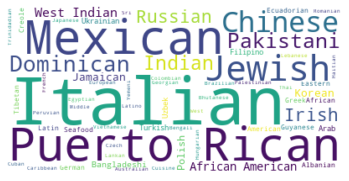

<Figure size 2160x3240 with 0 Axes>

In [23]:
# Visual of the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

**Let's create a word cloud of Brooklyn cuisine**

In [24]:
Brooklyn_data = Food[Food['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Unnamed: 0,Borough,Neighborhood,Cuisine
0,22,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,23,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,24,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,25,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,26,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani, Ukrainian"


In [37]:
Brooklyn_data

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani, Ukrainian"
5,Brooklyn,Bushwick,"Puerto Rican, Mexican, Dominican, Ecuadorian"
6,Brooklyn,Canarsie,"Jamaican, West Indian, African-American"
7,Brooklyn,Carroll Gardens,Italian
8,Brooklyn,Crown Heights,"Jamaican, West Indian, Jewish"
9,Brooklyn,East New York,"African-American, Dominican, Puerto Rican"


In [38]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani, Ukrainian"
5,"Puerto Rican, Mexican, Dominican, Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, Jewish"
9,"African-American, Dominican, Puerto Rican"


In [39]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [40]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [41]:
stopwords = set(STOPWORDS)

In [42]:
# start a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

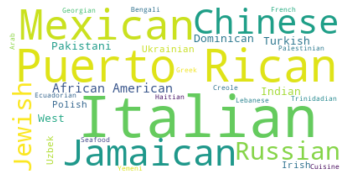

<Figure size 2160x3240 with 0 Axes>

In [43]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

**Let's create a word cloud of Queens cuisine**

In [45]:
Queens_data = Food[Food['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."
1,Queens,Bellerose,"Indian, Pakistani"
2,Queens,Flushing,"Chinese, Korean"
3,Queens,Forest Hills; Kew Gardens Hills; Rego Park,"Jewish, Russian, Uzbek"
4,Queens,Howard Beach; Ozone Park,Italian


In [46]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,"Indian, Pakistani"
2,"Chinese, Korean"
3,"Jewish, Russian, Uzbek"
4,Italian
5,"German, Polish"
6,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."
7,"Bangladeshi, Caribbean, African-American, Afri..."
8,"Arab, Chinese, Italian"
9,"Indian, Guyanese, West Indian, Pakistani, Bang..."


In [47]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [48]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [49]:
stopwords = set(STOPWORDS)

In [50]:
# start a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

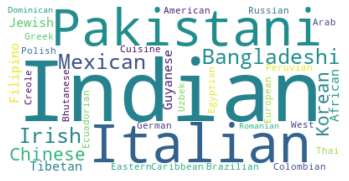

<Figure size 2160x3240 with 0 Axes>

In [52]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

**Let's create a word cloud of Manhattan cuisine**

In [54]:
Manhattan_data = Food[Food['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,"Chinese, Vietnamese"
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,Manhattan,East Village,"Japanese, Korean, Indian, Ukrainian"
3,Manhattan,Greenwich Village,"Italian, Middle Eastern"
4,Manhattan,Harlem,"Italian, African-American, Latin American, Wes..."


In [55]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,"Chinese, Vietnamese"
1,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,"Japanese, Korean, Indian, Ukrainian"
3,"Italian, Middle Eastern"
4,"Italian, African-American, Latin American, Wes..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, Latin American"
9,"Indian, Pakistani, Bangladeshi"


In [56]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [57]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [58]:
stopwords = set(STOPWORDS)

In [59]:
# start a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

MN_CUISINE_NYC.generate(MN_CUISINE_WC)

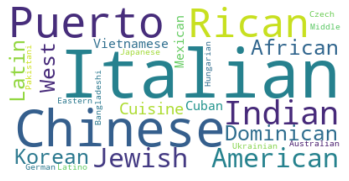

<Figure size 2160x3240 with 0 Axes>

In [60]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

**Let's create a word cloud of Bronx cuisine**

In [61]:
Bronx_data = Food[Food['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino


In [62]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [63]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [64]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [65]:
stopwords = set(STOPWORDS)

In [66]:
# start a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

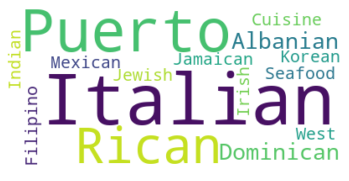

<Figure size 2160x3240 with 0 Axes>

In [67]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()